# Talhi Chaima M1-CS

# Partie IV — Mini-Projet 
## Mini-Projet 1 — Filtrage de Spams


### import the required libraries 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

### Step 1: Load and preprocess the data 

In [3]:
# Load the data
data = pd.read_csv('spambase.data', header=None)

# Split into features (X) and target variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

### Step 2: Create and train the logistic regression model

In [6]:
# Create the logistic regression model
model = LogisticRegression(tol=0.01,max_iter=2000,random_state=42)

# Train the model
model.fit(X, y)

LogisticRegression(max_iter=2000, random_state=42, tol=0.01)

### Step 3: Describe and comment on the model

### Logistic regression is popular for binary classification problems like spam detection. it works by fitting a linear function to the input features and passing it through a sigmoid function to obtain the predicted probabilities. 

### The model then uses a threshold to classify the instances into classes.so it can handle both continuous and categorical features and can provide interpretable coefficients that indicate the importance of each feature.

### Step 4: Validate the classifier with an acceptable error rate


In [8]:
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Compute the mean accuracy score
mean_accuracy = scores.mean()

# Check if the error rate is acceptable
if mean_accuracy >= 0.9:
    print("the error rate is  acceptable.")
else:
    print(" the error rate isn't acceptable.")

the error rate is  acceptable.


### Step 5: Visualize the cross-validation results

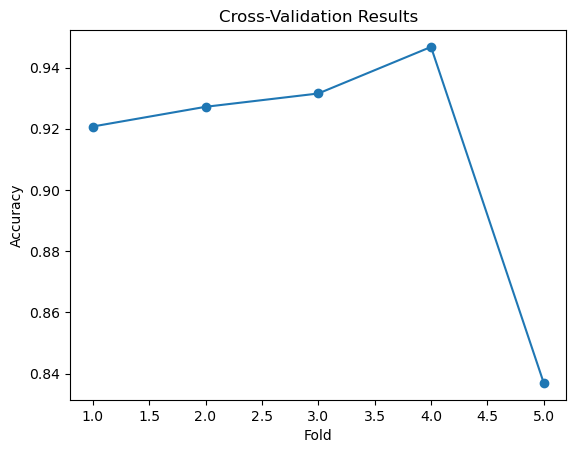

In [10]:
import matplotlib.pyplot as plt
# Plot the cross-validation results
plt.plot(range(1, 6), scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Results')
plt.show()

# CreditCard Fraud Detection

### Step 1: Load the data

In [31]:
import pandas as pd

# Load the data
data = pd.read_csv('/home/shym/Desktop/chaimas2/ml/TALHI-CHAIMA-CS-M1/creditcard.csv')
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

### Step 2: Compare transaction amounts for normal vs. fraud transactions

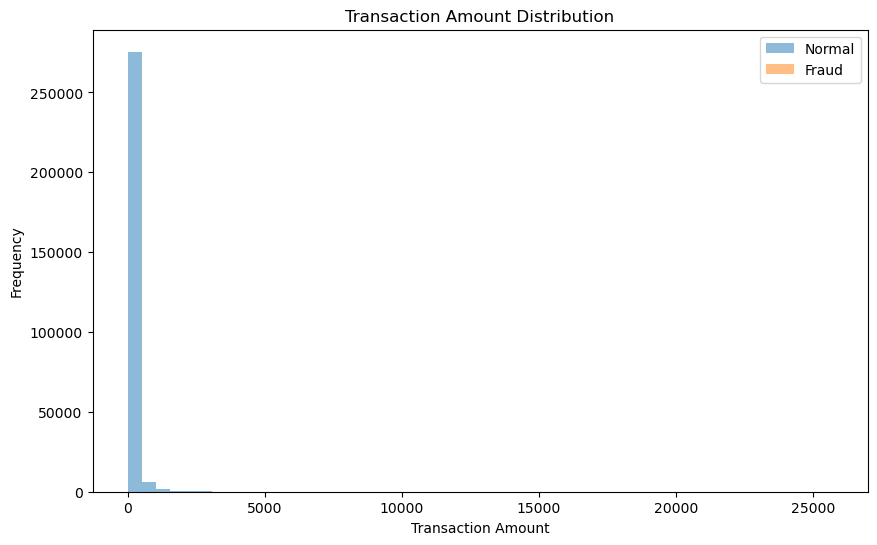

In [13]:
import matplotlib.pyplot as plt

# Separate normal and fraud transactions
normal_transactions = data[data['Class'] == 0]
fraud_transactions = data[data['Class'] == 1]

# Compare transaction amounts
plt.figure(figsize=(10, 6))
plt.hist(normal_transactions['Amount'], bins=50, alpha=0.5, label='Normal')
plt.hist(fraud_transactions['Amount'], bins=50, alpha=0.5, label='Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Transaction Amount Distribution')
plt.legend()
plt.show()

   ### Step 3: Create and train the logistic regression model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Separate features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = LogisticRegression(max_iter=2000)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

### Step 4: Describe and comment on the model

### Logistic regression is a popular algorithm for fraud detection tasks , In our case, the input variables have been transformed using PCA for privacy reasons, except for the 'Time' and 'Amount' variables. The 'Time' variable represents the time elapsed since the first transaction, while the 'Amount' variable represents the transaction amount.

### Step 5: Validate the classifier using performance metrics

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute performance metrics
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print performance metrics
print('Confusion Matrix:')
print(confusion)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('AUC:', auc)

Confusion Matrix:
[[56852    12]
 [   48    50]]
Accuracy: 0.9989466661985184
Precision: 0.8064516129032258
Recall: 0.5102040816326531
AUC: 0.7549965259035522


### visualize the confusion matrix

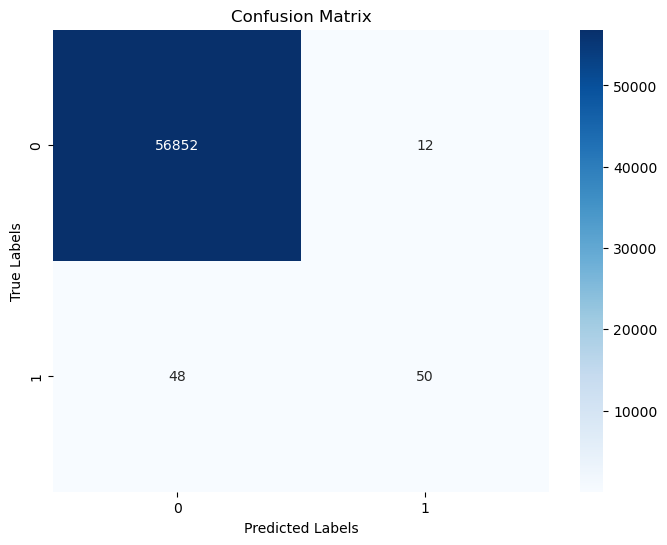

In [19]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Malicious URLs Detection

### Step 1: Load the data

In [37]:
import pandas as pd

# Load the data
data = pd.read_csv('/home/shym/Desktop/chaimas2/ml/TALHI-CHAIMA-CS-M1/malicious_phish.csv')
print(data)


                                                      url        type
0                                        br-icloud.com.br    phishing
1                     mp3raid.com/music/krizz_kaliko.html      benign
2                         bopsecrets.org/rexroth/cr/1.htm      benign
3       http://www.garage-pirenne.be/index.php?option=...  defacement
4       http://adventure-nicaragua.net/index.php?optio...  defacement
...                                                   ...         ...
651186            xbox360.ign.com/objects/850/850402.html    phishing
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/    phishing
651188         www.gamespot.com/xbox360/action/deadspace/    phishing
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)    phishing
651190          www.angelfire.com/goth/devilmaycrytonite/    phishing

[651191 rows x 2 columns]


### Step 2: Display the statistics of the data

In [26]:
# Display data statistics
statistics = data.describe()
print(statistics)

                                                      url    type
count                                              651191  651191
unique                                             641119       4
top     http://style.org.hc360.com/css/detail/mysite/s...  benign
freq                                                  180  428103


### Step 3: Create and train the logistic regression model and Validate the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Separate features (X) and target variable (y)
X = data['url']
y = data['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = LogisticRegression(max_iter=10)
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training URLs and transform them into feature matrices
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)


# Train the model on the transformed training data
model.fit(X_train_transformed, y_train)

# Make predictions on the transformed test data
y_pred = model.predict(X_test_transformed)

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('AUC:', auc)